In [1]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

C:\Users\yanor\Anaconda3\envs\matsuo\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


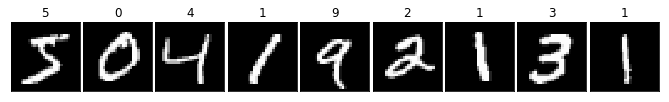

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)

# 各MNIST画像の上に（タイトルとして）対応するラベルを表示
for i in range(9):
    ax = fig.add_subplot(1, 9, i + 1, xticks=[], yticks=[])
    ax.set_title(str(y_train[i]))
    ax.imshow(x_train[i], cmap='gray')

In [3]:
from keras.utils import to_categorical

# 入力画像を行列(28x28)からベクトル(長さ784)に変換
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# 名義尺度の値をone-hot表現へ変換
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation

# モデルの「容器」を作成
model = Sequential()

# 「容器」へ各layer（Dense, Activation）を積み重ねていく（追加した順に配置されるので注意）
# 最初のlayerはinput_shapeを指定して、入力するデータの次元を与える必要がある
model.add(Dense(units=256, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(units=100))
model.add(Activation('relu'))
model.add(Dense(units=10))
model.add(Activation('softmax'))

# モデルの学習方法について指定しておく
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [5]:
model.fit(x_train, y_train,
          batch_size=1000, epochs=10, verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 199us/step - loss: 8.4964 - acc: 0.4644 - val_loss: 6.2161 - val_acc: 0.6057
Epoch 2/10
60000/60000 [==============================] - 7s 122us/step - loss: 5.7872 - acc: 0.6347 - val_loss: 5.6690 - val_acc: 0.6437
Epoch 3/10
60000/60000 [==============================] - 8s 130us/step - loss: 5.5543 - acc: 0.6509 - val_loss: 5.5068 - val_acc: 0.6538
Epoch 4/10
60000/60000 [==============================] - 7s 113us/step - loss: 5.4260 - acc: 0.6586 - val_loss: 5.4629 - val_acc: 0.6567
Epoch 5/10
60000/60000 [==============================] - 6s 99us/step - loss: 5.3658 - acc: 0.6630 - val_loss: 5.4171 - val_acc: 0.6591
Epoch 6/10
60000/60000 [==============================] - 6s 102us/step - loss: 4.1356 - acc: 0.7358 - val_loss: 2.4180 - val_acc: 0.8415
Epoch 7/10
60000/60000 [==============================] - 6s 94us/step - loss: 2.2350 - acc: 0.8541 - val_loss: 2.2222 - v

In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.101090726085752
Test accuracy: 0.8636


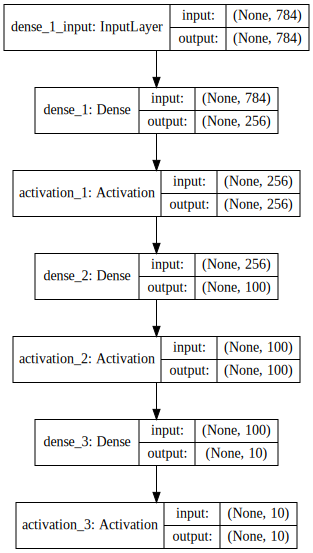

In [7]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))